In [ ]:
%run Exp_analysis.ipynb

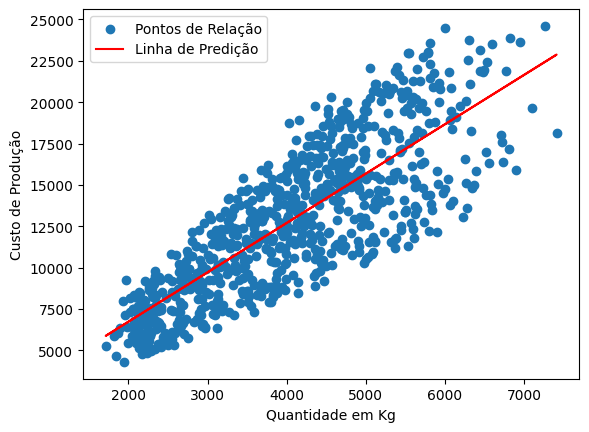

In [10]:
from sklearn import linear_model
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

Y = data_frame2[['Custo_de_producao_reais']]
X = data_frame2[['Quantidade_Produzida_kg']]

modelo = LinearRegression()
modelo.fit(X,Y)

a_coeff = modelo.coef_
l_coeff = modelo.intercept_

plt.scatter(X,Y, label = "Pontos de Relação")
plt.plot(X, a_coeff*X + l_coeff , color='red', label ="Linha de Predição")

plt.xlabel("Quantidade em Kg")  
plt.ylabel("Custo de Produção")    

plt.legend()
plt.show()

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, r2_score

# Previsões do modelo
Y_pred = modelo.predict(X)

# Calcular o MAPE
mape = mean_absolute_percentage_error(Y, Y_pred) * 100

# Calcular o R²
r2 = r2_score(Y, Y_pred) 

print(f"MAPE: {mape:.2f}%")
print(f"R²: {r2:.2f}")

MAPE: 17.80%
R²: 0.66


c:\Users\Marcelo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


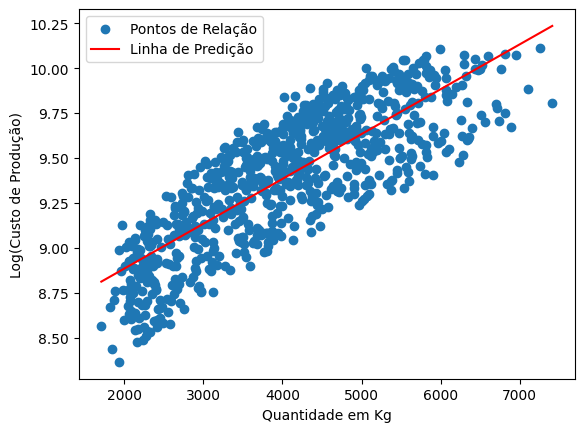

In [14]:
#TRANSFORMAÇÃO DO EIXO Y PARA LOG-Y PARA MELHORAR A CORRELAÇÃO POSITIVA 

Y_log = np.log(data_frame2['Custo_de_producao_reais'])

modelo_log = LinearRegression()
modelo_log.fit(X, Y_log)

a_coeff_log = modelo_log.coef_[0]  
l_coeff_log = modelo_log.intercept_

plt.scatter(X, Y_log, label="Pontos de Relação")


#calcular os valores preditos em escala logarítmica
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
Y_pred_log = modelo_log.predict(X_range)
plt.plot(X_range, Y_pred_log, color='red', label="Linha de Predição")


plt.xlabel("Quantidade em Kg")
plt.ylabel("Log(Custo de Produção)") 
plt.legend()
plt.show()


c:\Users\Marcelo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


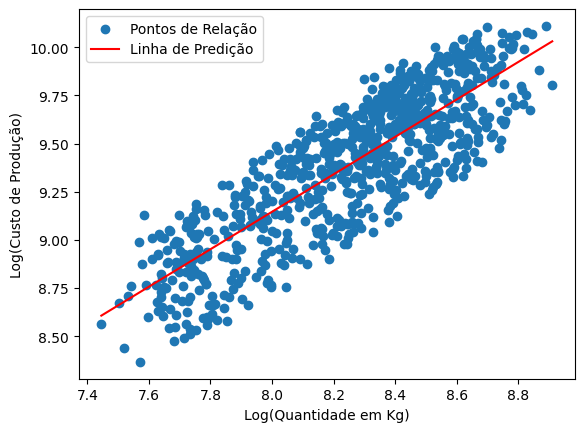

In [8]:
# TRANSFORMAÇÃO DE AMBOS OS EIXOS PARA LOG PARA MELHORAR A CORRELAÇÃO POSITIVA 

Y_log = np.log(data_frame2['Custo_de_producao_reais']) 

X_log = np.log(data_frame2['Quantidade_Produzida_kg'])
X_log = X_log.to_frame()

modelo_log = LinearRegression()
modelo_log.fit(X_log, Y_log)

a_coeff_log = modelo_log.coef_[0]  
l_coeff_log = modelo_log.intercept_

plt.scatter(X_log, Y_log, label="Pontos de Relação")


#calcular os valores preditos em escala logarítmica
X_log_range = np.linspace(X_log.min(), X_log.max(), 100).reshape(-1, 1)
Y_pred_log = modelo_log.predict(X_log_range)
plt.plot(X_log_range, Y_pred_log, color='red', label="Linha de Predição")


plt.xlabel("Log(Quantidade em Kg)")
plt.ylabel("Log(Custo de Produção)") 
plt.legend()
plt.show()